In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

In [3]:

np.random.seed(42) # Para reproducibilidad
n_components = 10000
mean_weight = 50
desviacion_standard = 2
weights = np.random.normal(mean_weight, desviacion_standard, n_components)

weights

array([50.99342831, 49.7234714 , 51.29537708, ..., 48.58936655,
       50.99153115, 51.28877691])

In [4]:
max_weight = np.max(weights)
min_weight = np.min(weights)
print(f"El peso máximo es {max_weight:.2f} g")
print(f"El peso mínimo es {min_weight:.2f} g")

El peso máximo es 57.85 g
El peso mínimo es 42.16 g


In [5]:
# Simular defectos (probabilidad del 2%)
probailidad_defecto = 0.02
defectos = np.random.choice([0, 1], size = n_components, p = [1 - probailidad_defecto, probailidad_defecto])

data = pd.DataFrame({'Peso': weights, 'Defecto': defectos})

In [6]:
print(data.head(50))

         Peso  Defecto
0   50.993428        0
1   49.723471        0
2   51.295377        0
3   53.046060        0
4   49.531693        0
5   49.531726        0
6   53.158426        0
7   51.534869        0
8   49.061051        0
9   51.085120        0
10  49.073165        0
11  49.068540        0
12  50.483925        0
13  46.173440        0
14  46.550164        0
15  48.875425        0
16  47.974338        0
17  50.628495        0
18  48.183952        0
19  47.175393        0
20  52.931298        0
21  49.548447        0
22  50.135056        0
23  47.150504        0
24  48.911235        0
25  50.221845        0
26  47.698013        0
27  50.751396        0
28  48.798723        0
29  49.416613        0
30  48.796587        0
31  53.704556        0
32  49.973006        0
33  47.884578        0
34  51.645090        0
35  47.558313        0
36  50.417727        0
37  46.080660        0
38  47.343628        0
39  50.393722        0
40  51.476933        0
41  50.342737        0
42  49.7687

In [7]:
count_zero = (data['Defecto'] == 0).sum()
count_one = (data['Defecto'] == 1).sum()

porcentaje_zero = (count_zero / n_components) * 100
porcentaje_one = (count_one / n_components) * 100

print(f"Cantidad de componentes sin defectos: {count_zero}")
print(f"Cantidad de componentes con defectos: {count_one}")
print(f"El porcentaje de componentes sin defectos es {porcentaje_zero:.2f}%")
print(f"El porcentaje de componentes con defectos es {porcentaje_one:.2f}%")

Cantidad de componentes sin defectos: 9774
Cantidad de componentes con defectos: 226
El porcentaje de componentes sin defectos es 97.74%
El porcentaje de componentes con defectos es 2.26%


In [8]:
print("Estadisticas descriptivas: ")
print(data.describe())

Estadisticas descriptivas: 
               Peso       Defecto
count  10000.000000  10000.000000
mean      49.995728      0.022600
std        2.006925      0.148632
min       42.155199      0.000000
25%       48.654819      0.000000
50%       49.994810      0.000000
75%       51.342162      0.000000
max       57.852475      1.000000


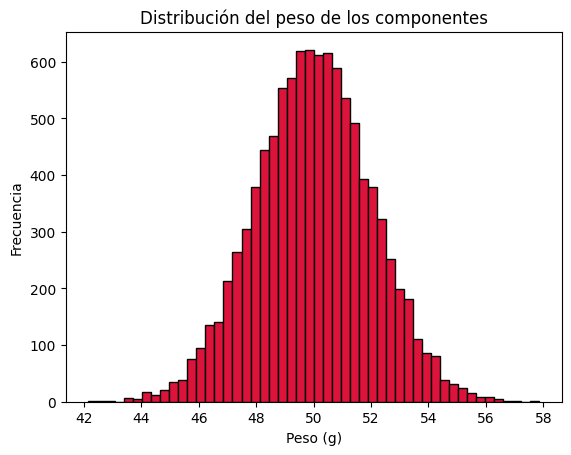

In [10]:
plt.hist(data['Peso'], bins = 50, edgecolor = 'black', color='crimson')
plt.title("Distribución del peso de los componentes")
plt.xlabel("Peso (g)")
plt.ylabel("Frecuencia")
plt.show()

In [14]:
weights_df = pd.DataFrame(weights, columns = ['Peso'])
defects_df = pd.DataFrame(defectos, columns = ['Defecto'])

sample2 = np.array([np.random.choice(weights, size = 30, replace=False) for _ in range(1000)])

comined_samples = sample2.flatten()
combined_samples_df = pd.DataFrame(comined_samples, columns = ['30 MIL Samples'])

final_df = pd.concat([weights_df, defects_df, combined_samples_df], axis = 1)

final_df.to_excel('final_df.xlsx', index = False)

print("Los datos se han guardado en final_df.xlsx")

Los datos se han guardado en final_df.xlsx


In [15]:
print(final_df.describe())

               Peso       Defecto  30 MIL Samples
count  10000.000000  10000.000000    30000.000000
mean      49.995728      0.022600       49.992619
std        2.006925      0.148632        2.016167
min       42.155199      0.000000       42.155199
25%       48.654819      0.000000       48.663310
50%       49.994810      0.000000       49.983774
75%       51.342162      0.000000       51.325682
max       57.852475      1.000000       57.852475


In [ ]:
def full_stats(df):
    return df.describe().T.assign(
        skew = df.skew(),
        kurtosis = df.kurtosis(),
        variance = df.var(),
        unique = df.nunique(),
    )

print(full_stats(final_df))

                  count       mean       std        min        25%        50%  \
Peso            10000.0  49.995728  2.006925  42.155199  48.654819  49.994810   
Defecto         10000.0   0.022600  0.148632   0.000000   0.000000   0.000000   
30 MIL Samples  30000.0  49.992619  2.016167  42.155199  48.663310  49.983774   

                      75%        max      skew   kurtosis  variance  unique  
Peso            51.342162  57.852475  0.001964   0.027093  4.027747   10000  
Defecto          0.000000   1.000000  6.425208  39.291153  0.022091       2  
30 MIL Samples  51.325682  57.852475  0.011010   0.093150  4.064929    9462  


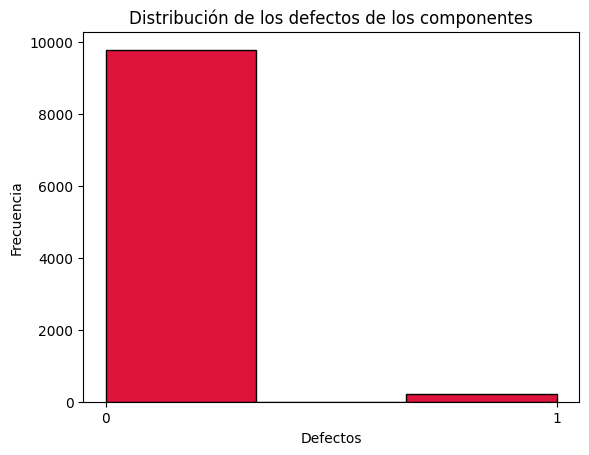

In [26]:
plt.hist(data['Defecto'], bins = 3, edgecolor = 'black', color='crimson')
plt.xticks([0, 1])
plt.title("Distribución de los defectos de los componentes")
plt.xlabel("Defectos")
plt.ylabel("Frecuencia")
plt.show()

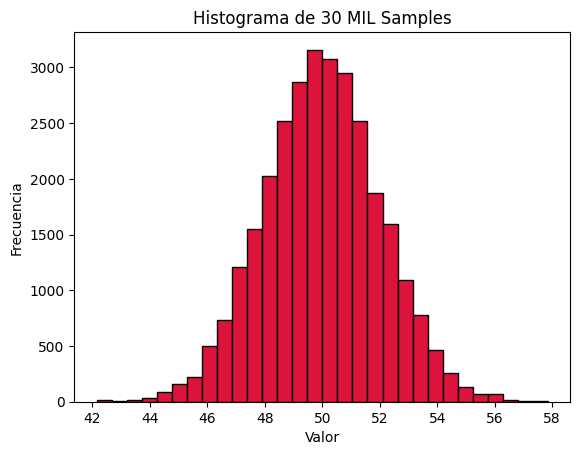

In [36]:
plt.hist(final_df['30 MIL Samples'], bins = 30, edgecolor = 'black', color='crimson')
plt.title("Histograma de 30 MIL Samples")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
sample2 = [np.mean(np.random.choice(weights, size = 30, replace=False)) for _ in range(1000)]
sample_means = [np.mean(sample3) for sample3 in sample2]

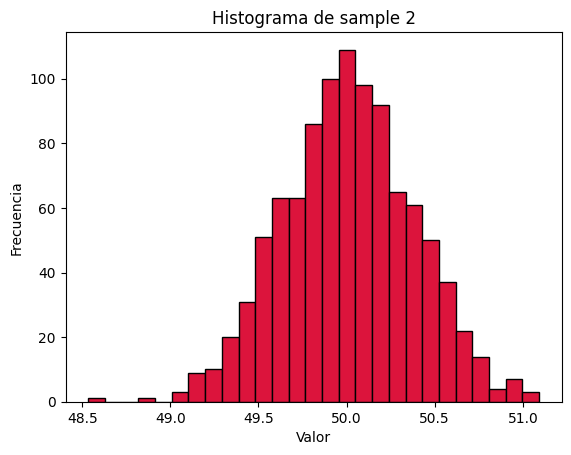

In [42]:
plt.hist(sample_means, bins = 27, edgecolor = 'black', color='crimson')
plt.title("Histograma de sample 2")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

In [32]:
df_sample2 = pd.DataFrame(sample2)

df_sample2.to_excel('samples_1000x30.xlsx', index = False, header=False)

print("Las 1000 columnas de 30 filas se han guardado en samples_1000x30.xlsx")

Las 1000 columnas de 30 filas se han guardado en samples_1000x30.xlsx


In [33]:
df_sample3 = pd.DataFrame(sample_means)

df_sample3.to_excel('sample_means_1000x30.xlsx', index = False, header=False)

print("Los promedios de las 1000 columnas de 30 filas se han guardado en sample_means_1000x30.xlsx")

Los promedios de las 1000 columnas de 30 filas se han guardado en sample_means_1000x30.xlsx


## Teoría de la Estimación

In [44]:
confidence_level = 0.95
sampli = np.random.choice(weights, size = 30, replace=False)
sampli_mean = np.mean(sampli)
sampli_std = np.std(sampli, ddof = 1)

In [46]:
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, df=len(sampli) - 1) *  sampli_std /  np.sqrt(len(sampli))
print(f"Media muestral: {sampli_mean:.2f}, Intervalo de confianza la 95%: [{sampli_mean - margin_of_error:.2f}, {sampli_mean + margin_of_error:.2f}]")

Media muestral: 50.39, Intervalo de confianza la 95%: [49.78, 51.00]


In [47]:
prob_x_greater_52 = 1 - stats.norm.cdf(52, loc=mean_weight, scale=desviacion_standard)
print(f"Probabilidad de que un componente pese más de 52 g: {prob_x_greater_52:.2f}")

Probabilidad de que un componente pese más de 52 g: 0.16
